<a href="https://colab.research.google.com/github/saif-raja/Capstone-Project-3_Regression-TED_Talks_Views_Prediction/blob/main/Saif_Individual_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font size="+3" color='#053c96'><b> About this Project </b></font>

This is a Machine Learning Capstone Project ,

done for completion of the AlmaBetter Premium Program ,

[AlmaBetter School](https://www.almabetter.com/) , Bengaluru India


This Project is done by :
* Saifuddin Raja
* Hariom Bharadwaj
* Mayank Kumar
* Shivam Mishra
* Sarvesh Yadav


#<font size="+3" color='#053c96'><b> Problem Statement</b></font>

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.
 
Founded in 1984 by Richard Salman as a nonprofit organization 
that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. 

The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

# <font size="+3" color='#053c96'><b>Bussiness Goal</b></font>

#<font size="+3" color='#053c96'><b> The Structure of this notebook</b></font>



#**Project Work flow**
---

1. Importing Libraries

2. Loading the Dataset

3. EDA on features 

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Fitting the regression models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion
--- 





* About this Project
* Problem Statement
* Bussiness Goal
* Approach Taken in this Project
* Initial Code : Initliaing the Data and Modules
* Data Preparation and Cleaning
* Exploratory Data Analysis
* Data Preprocessing and Feature Engineering
* Building Prediction Systems using ML Models
* Inferences and Conclusions
* What Worked? What Did Not Work?
* Future Work and More Ideas to Explore

#<font size="+3" color='#053c96'><b> Understanding the given Data</b></font>


For each feature in the given dataset , 

What is the meaning of the feature and its data type 

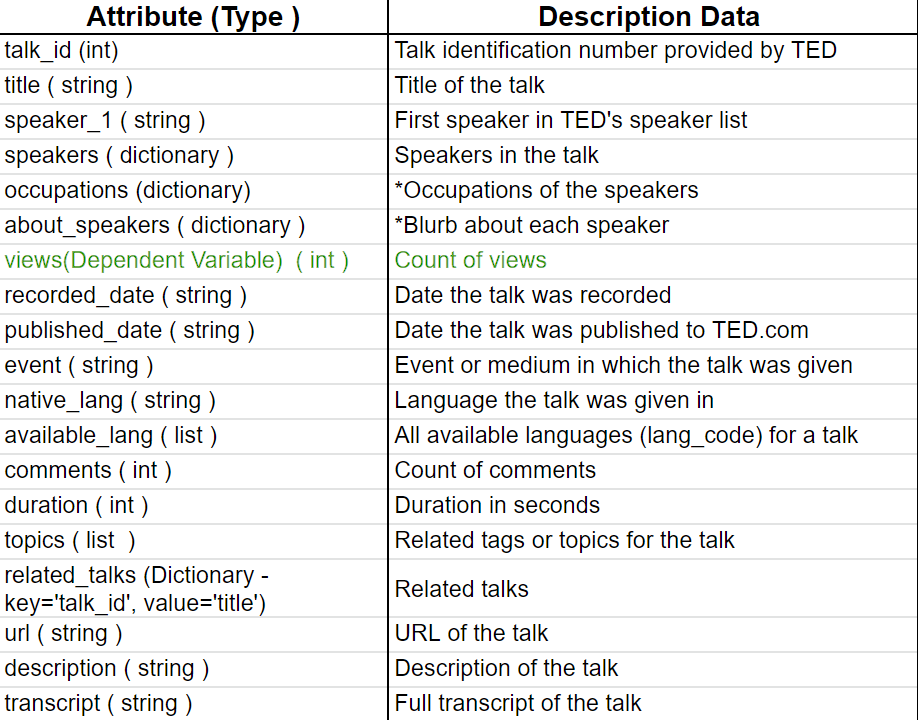

To perform well on predicting TED Talks video views, I try to use as much features from the dataset as possible. Nevertheless, I have decided not to use some of the parameters (e.g., url, main speaker name, etc.) because they won't be much useful in predicting the views. Using some of the features (such as description, tags) I've left for further work.
- **duration** - duration of the video
- **event** - name of the event of which the talk is part of
- **languages** - number of languages in which the talk is available in
- **num_speaker** - number of speakers in the talk
- **film_date**, **published_date** - date of filming and publishing the talk, from which I extract:
  - **day of the week**
  - **month**
  - **year**
- **related-talks** - an array that consists of 6 related talks, from which I extract the average number of views

I've excluded the **comments** and **ratings** features, as using those I consider cheating. The point of the task is to predict the number of views for a video which has just been released or is yet to be released. After going through the data analysis notebooks I mentined earlier, I decided to exclude the following features:
- **comments** - number of comments on the video
- **ratings** - number of times the video has been rated
- **name** - name of the talk, which includes the name main speaker and title of the talk
- **main speaker** - name of the main speaker that leads the talk, we rarely see the same speaker do more than 1 talk 
- **title** - title of the talk
- **url** - url link to the talk

The following features I leave for future work:
- **description** - description of the talk, will need to encode this information
- **tags** - tags that are associated with the talk
- **speaker_occupation** - occupation of the main speaker

###**Dataset Information**
* Number of instances: 4,005
* Number of attributes: 19
---
###**Features information:**
###The dataset contains features like:

* **talk_id**: Talk identification number provided by TED
* **title**: Title of the talk
* **speaker_1**: First speaker in TED's speaker list
* **all_speakers**: Speakers in the talk
* **occupations**: Occupations of the speakers
* **about_speakers**: Blurb about each speaker
* **recorded_date**: Date the talk was recorded
* **published_date**: Date the talk was published to TED.com
* **event**: Event or medium in which the talk was given
* **native_lang**: Language the talk was given in
* **available_lang**: All available languages (lang_code) for a talk
* **comments**: Count of comments
* **duration**: Duration in seconds
* **topics**: Related tags or topics for the talk
* **related_talks**: Related talks (key='talk_id',value='title')
* **url**: URL of the talk
* **description**: Description of the talk
* **transcript**: Full transcript of the talk
---
###**Target Variable :**
* **'views'**: Count of views
---
###**Goal: The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.**

#<font size="+3" color='#053c96'><b> Initial Code : Initliaing the Data and Modules </b></font>


---
##<font size="+2" color='#053c96'><b> Installing and Importing Libraries</b></font>

### Libraries used in this Project:

Datawrangling : 
* Numpy
* Pandas

For Graphing : 
* Matplotib
* Seaborn 

Machine learning :
* Scikit-Learn
* SK-Opt
* XGBoost
* CatBoost

Miscellaneous :
* Google colab tools

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import seaborn as sns
import seaborn as sb
sns.set()

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import colors
from matplotlib.ticker import PercentFormatter


np.seterr(all='warn', divide='warn', over='warn', under='warn', invalid='warn')

pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 75)

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator
pd.plotting.register_matplotlib_converters()
import calendar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ML Libraries


In [ ]:
# !pip install scikit-optimize
# !pip install catboost

In [ ]:
import xgboost
print('xgboost %s' % xgboost.__version__)
from xgboost import XGBClassifier

import skopt
print('skopt %s' % skopt.__version__)
from skopt import BayesSearchCV

import sklearn
print('sklearn %s' % sklearn.__version__)

import catboost
print('catboost %s' % catboost.__version__)
from catboost import CatBoostClassifier, Pool, FeaturesData


xgboost 0.90
skopt 0.8.1
sklearn 0.22.2.post1
catboost 0.26.1


In [ ]:
import sklearn

from sklearn.model_selection import ShuffleSplit , StratifiedKFold , RepeatedStratifiedKFold ,train_test_split
from sklearn.model_selection import cross_val_score , cross_validate ,cross_val_predict

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline


##<font size="+2" color='#053c96'><b> Import Dataset and Initial Data Checks</b></font>


In [ ]:
filepath = '/content/drive/MyDrive/AlmaBetter/Capstone3_ML_NLP_Regression/main_data.csv'
data = pd.read_csv(filepath)

In [ ]:
dataset=data.copy()

In [ ]:
dataset['talk_id'].nunique()/(len(dataset))

1.0

In [ ]:
duplicate=dataset[dataset.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [talk_id, title, speaker_1, all_speakers, occupations, about_speakers, views, recorded_date, published_date, event, native_lang, available_lang, comments, duration, topics, related_talks, url, description, transcript]
Index: []


there is no duplicated rows in the dataset 

the above summary shows the number of observations that have the same respose and same features


In [ ]:
dataset = dataset.set_index('talk_id')
#dataset.set_index('talk_id' , inplace = True)


setting Talk_id as the index ,so that it can be used for quick indexing , using iloc , instead of needing to do dl.loc[ talk_id == talk_id ]

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005 entries, 1 to 62794
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   all_speakers    4001 non-null   object 
 3   occupations     3483 non-null   object 
 4   about_speakers  3502 non-null   object 
 5   views           4005 non-null   int64  
 6   recorded_date   4004 non-null   object 
 7   published_date  4005 non-null   object 
 8   event           4005 non-null   object 
 9   native_lang     4005 non-null   object 
 10  available_lang  4005 non-null   object 
 11  comments        3350 non-null   float64
 12  duration        4005 non-null   int64  
 13  topics          4005 non-null   object 
 14  related_talks   4005 non-null   object 
 15  url             4005 non-null   object 
 16  description     4005 non-null   object 
 17  transcript      4005 non-null   

In [ ]:
dataset.isnull().sum()

title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

*  There are  missing value in the data 
*  By looking at the info of the dataset we can get a rough idea on the numeric and the string columns

* By looking at the summary of the data we can infer the mean,standard deviation, min and max of the 
* We will be able to get an idea about the outliers here by the percentiles 

In [ ]:
dataset.describe(percentiles = [.25,.50,.75,.95,.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,6182301.40,16299833.68,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,531.65,1038.73,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,1230.80,1601.12,3922.0


In [ ]:
dataset.describe(include='object').T

,count,unique,top,freq
title,4005,4005,A history of Indigenous languages -- and how t...,1
speaker_1,4005,3274,Alex Gendler,34
all_speakers,4001,3306,{0: 'Alex Gendler'},34
occupations,3483,2049,{0: ['writer']},53
about_speakers,3502,2977,{0: 'Alex Rosenthal takes everyday experiences...,10
recorded_date,4004,1334,2017-04-24,97
published_date,4005,2962,2017-09-07,27
event,4005,459,TED-Ed,556
native_lang,4005,12,en,3957
available_lang,4005,3902,['en'],24


we can see here that , only Annual_Premium feature has extreme values ( outliers ) , 

this will be handled later in the Data Preprocessing Section

##<font size="+2" color='#053c96'><b> Data Preparation and Cleaning </b> </font>



In [ ]:
list(dataset.columns.values)

['title',
 'speaker_1',
 'all_speakers',
 'occupations',
 'about_speakers',
 'views',
 'recorded_date',
 'published_date',
 'event',
 'native_lang',
 'available_lang',
 'comments',
 'duration',
 'topics',
 'related_talks',
 'url',
 'description',
 'transcript']

In [ ]:
numerical_features   = ['duration',]
temporal_features    = ['recorded_date' , 'published_date']
categorical_features = ['event']

meta_features        = ['topics']
text_corpus_features = ['title' , 'about_speakers' , 'occupations' , 'transcript' , 'description' ,]

irrelevant_features  = ['url' , 'all_speakers' , 'speaker_1' , 'native_lang']
unavailable_features = ['available_lang' , 'comments' , 'related_talks']

target = ['views']


all_features = numerical_features + temporal_features + categorical_features + meta_features + text_corpus_features + irrelevant_features + unavailable_features + target

list(zip(sorted(all_features) , sorted(list(dataset.columns.values))))
sorted(all_features) == sorted(list(dataset.columns.values))


True

In [ ]:
dataset = dataset[target + numerical_features + temporal_features + categorical_features + meta_features + text_corpus_features]

In [ ]:
dataset.head(1).T

talk_id,1
views,3523392
duration,977
recorded_date,2006-02-25
published_date,2006-06-27
event,TED2006
topics,"['alternative energy', 'cars', 'climate change..."
title,Averting the climate crisis
about_speakers,{0: 'Nobel Laureate Al Gore focused the world’...
occupations,{0: ['climate advocate']}
transcript,"Thank you so much, Chris. And it's truly a gre..."


In [ ]:
dataset['event'].value_counts()

TED-Ed             556
TED2018             96
TED2017             96
TED2019             91
TED2014             84
                  ... 
TEDxSalford          1
TEDxO'Porto          1
TEDxOrangeCoast      1
TEDxBeirut           1
TEDxSBU              1
Name: event, Length: 459, dtype: int64

In [ ]:
dataset['event_TED-Ed_BE'] = dataset['event'] == 'TED-Ed'
dataset['event_TED-Ed_BE'] = dataset['event_TED-Ed_BE'].astype(int)

binary encoding will be fine here , whether event is TEDx  or not 

or we can also drop this feature altogether , as it has 8% of the data in TEDx

machien learning lagorithms will simply ignore this very minority category

In [ ]:
def get_datatypes_report (dataset) :
  for column in dataset.columns.values :
    print( column ,' '*(25-len(column)) , ' : ' , dataset[column].isnull().sum(), ' '*5, ' : ' , [x for x in {type(dataset.loc[x,column]) for x in dataset.index }]  )

get_datatypes_report (dataset)


views                       :  0        :  [<class 'numpy.int64'>]
duration                    :  0        :  [<class 'numpy.int64'>]
recorded_date               :  1        :  [<class 'str'>, <class 'float'>]
published_date              :  0        :  [<class 'str'>]
event                       :  0        :  [<class 'str'>]
topics                      :  0        :  [<class 'str'>]
title                       :  0        :  [<class 'str'>]
about_speakers              :  503        :  [<class 'str'>, <class 'float'>]
occupations                 :  522        :  [<class 'str'>, <class 'float'>]
transcript                  :  0        :  [<class 'str'>]
description                 :  0        :  [<class 'str'>]
event_TED-Ed_BE             :  0        :  [<class 'numpy.int64'>]


In [ ]:
dataset[dataset['recorded_date'].apply(type) != str]

,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,event_TED-Ed_BE
talk_id,,,,,,,,,,,,
56629,1276272,1039,NaN,2020-01-23,TEDxChristchurch,"['global development', 'development', 'social ...",The unpaid work that GDP ignores -- and why it...,{0: 'Marilyn Waring advocates for a public pol...,{0: ['economist']},(In Maori: My mountain is Taupiri.) (Waikato i...,"If you: do laundry, are (or have been) pregnan...",0


In [ ]:
NAT_in_recorded_date = dataset[dataset['recorded_date'].isna()]['recorded_date'].index.to_list()

for NaN_place in NAT_in_recorded_date :
  dataset.loc[NaN_place , 'recorded_date'] = dataset.loc[NaN_place , 'published_date']

In [ ]:
dataset[dataset['recorded_date'].apply(type) != str]

,views,duration,recorded_date,published_date,event,topics,title,about_speakers,occupations,transcript,description,event_TED-Ed_BE
talk_id,,,,,,,,,,,,


In [ ]:
dataset[temporal_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4005 entries, 1 to 62794
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   recorded_date   4005 non-null   object
 1   published_date  4005 non-null   object
dtypes: object(2)
memory usage: 253.9+ KB


In [ ]:
dataset['recorded_date']  = pd.to_datetime(dataset['recorded_date']  ,format='%Y-%m-%d')
dataset['published_date'] = pd.to_datetime(dataset['published_date'] ,format='%Y-%m-%d')

dataset['days_taken_to_publish'] = dataset['published_date'] - dataset['recorded_date']

In [ ]:
last_publishing_date = dataset['published_date'].max()

dataset['time_since_published'] = last_publishing_date - pd.DatetimeIndex(dataset['published_date'])

In [ ]:
last_publishing_date

Timestamp('2020-04-30 00:00:00')

In [ ]:
dataset['daily_views'] = dataset['views'] / ( dataset['time_since_published'].apply(lambda x : x.days) + 1 )

In [ ]:
dataset['month'] = pd.DatetimeIndex(dataset['published_date']).month
dataset['month'] = dataset['month'].apply(lambda x: calendar.month_abbr[x])
dataset['year'] = pd.DatetimeIndex(dataset['published_date']).year
dataset['day']  = pd.DatetimeIndex(dataset['published_date']).day

There are only 6 null values in the **speaker_occupation** feature, I will fill in those missing values with a default 'Other' value.

In [ ]:
dataset['occupations'].fillna(str({0:['other']}),inplace=True,axis=0)
dataset['about_speakers'].fillna(str({0:''}),inplace=True,axis=0)

In [ ]:
import ast
# dataset['all_speakers']   = dataset['all_speakers']   .apply(ast.literal_eval)
# dataset['available_lang'] = dataset['available_lang'] .apply(ast.literal_eval)
# dataset['related_talks']  = dataset['related_talks']  .apply(ast.literal_eval)

dataset['occupations']    = dataset['occupations']    .apply(ast.literal_eval)
dataset['topics']         = dataset['topics']         .apply(ast.literal_eval)
dataset['about_speakers'] = dataset['about_speakers'] .apply(ast.literal_eval)


In [ ]:
get_datatypes_report (dataset)

views                       :  0        :  [<class 'numpy.int64'>]
duration                    :  0        :  [<class 'numpy.int64'>]
recorded_date               :  0        :  [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
published_date              :  0        :  [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
event                       :  0        :  [<class 'str'>]
topics                      :  0        :  [<class 'list'>]
title                       :  0        :  [<class 'str'>]
about_speakers              :  0        :  [<class 'dict'>]
occupations                 :  0        :  [<class 'dict'>]
transcript                  :  0        :  [<class 'str'>]
description                 :  0        :  [<class 'str'>]
event_TED-Ed_BE             :  0        :  [<class 'numpy.int64'>]
days_taken_to_publish       :  0        :  [<class 'pandas._libs.tslibs.timedeltas.Timedelta'>]
time_since_published        :  0        :  [<class 'pandas._libs.tslibs.timedeltas.Timedelta'>]

In [ ]:
dataset.head(1).T

talk_id,1
views,3523392
duration,977
recorded_date,2006-02-25 00:00:00
published_date,2006-06-27 00:00:00
event,TED2006
topics,"[alternative energy, cars, climate change, cul..."
title,Averting the climate crisis
about_speakers,{0: 'Nobel Laureate Al Gore focused the world’...
occupations,{0: ['climate advocate']}
transcript,"Thank you so much, Chris. And it's truly a gre..."


In [ ]:
#dataset['occupations'] = dataset['occupations'].apply(lambda x : [item for sublist in list(x.values()) for item in sublist] )
dataset['occupations'] = dataset['occupations'].apply(lambda x : ' '.join([str(item) for sublist in list(x.values()) for item in sublist] ))

In [ ]:
dataset['about_speakers'] = dataset['about_speakers'] .apply( lambda x : ' '.join([str(elem) for elem in x.values()]) )

In [ ]:
get_datatypes_report(dataset)

views                       :  0        :  [<class 'numpy.int64'>]
duration                    :  0        :  [<class 'numpy.int64'>]
recorded_date               :  0        :  [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
published_date              :  0        :  [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]
event                       :  0        :  [<class 'str'>]
topics                      :  0        :  [<class 'list'>]
title                       :  0        :  [<class 'str'>]
about_speakers              :  0        :  [<class 'str'>]
occupations                 :  0        :  [<class 'str'>]
transcript                  :  0        :  [<class 'str'>]
description                 :  0        :  [<class 'str'>]
event_TED-Ed_BE             :  0        :  [<class 'numpy.int64'>]
days_taken_to_publish       :  0        :  [<class 'pandas._libs.tslibs.timedeltas.Timedelta'>]
time_since_published        :  0        :  [<class 'pandas._libs.tslibs.timedeltas.Timedelta'>]
d

In [ ]:
dataset.occupations.head(5)

talk_id
1                         climate advocate
92    global health expert; data visionary
7                     technology columnist
53      activist for environmental justice
66                         author educator
Name: occupations, dtype: object

In [ ]:
dataset.topics.head(5)

talk_id
1     [alternative energy, cars, climate change, cul...
92    [Africa, Asia, Google, demo, economics, global...
7     [computers, entertainment, interface design, m...
53    [MacArthur grant, activism, business, cities, ...
66    [children, creativity, culture, dance, educati...
Name: topics, dtype: object

In [ ]:
topic_counter = 0
topic_dict={}
for talk_id , row in dataset.iterrows():
  for topic in row['topics']:
    topic_counter +=1 
    if topic in topic_dict :
      topic_dict[topic] +=1
    else :
      topic_dict[topic] =1

print(topic_counter , len(topic_dict.keys()))

from collections import OrderedDict
import pprint
pp = pprint.PrettyPrinter(indent=4)

ordered_topic_histogram = OrderedDict(sorted(topic_dict.items(), key=lambda topic_dict : topic_dict[1] ,reverse = True))
#pp.pprint(ordered_topic_histogram)

31700 457


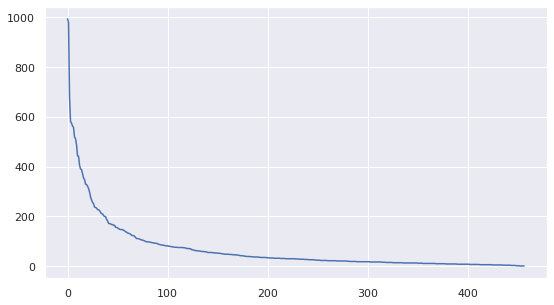

In [ ]:
plt.plot(list(ordered_topic_histogram.values()))

In [ ]:
dataset['topics_string'] = dataset['topics'].apply( lambda x : ' '.join([str(elem) for elem in x]) )

In [ ]:
dataset['text_corpus'] = \
  10*(' ' + dataset['topics_string']) + 10*(' ' + dataset['event']) \
+ 10*(' ' + dataset['occupations']) + dataset['transcript'] + ' ' \
+ dataset['description'] + ' ' + dataset['about_speakers'] + ' ' \
+ 3*(' ' + dataset['title'])

dataset['text_corpus']

talk_id
1         alternative energy cars climate change cultur...
92        Africa Asia Google demo economics global issu...
7         computers entertainment interface design medi...
53        MacArthur grant activism business cities envi...
66        children creativity culture dance education p...
                               ...                        
62678     activism data technology mental health softwa...
62782     TED-Ed education history animation intelligen...
62263     society law policy justice system TEDx societ...
62784     TED-Ed education animation United States wome...
62794     animals TED-Ed animation oceans science educa...
Name: text_corpus, Length: 4005, dtype: object

In [ ]:
list(dataset.columns.values)

['views',
 'duration',
 'recorded_date',
 'published_date',
 'event',
 'topics',
 'title',
 'about_speakers',
 'occupations',
 'transcript',
 'description',
 'event_TED-Ed_BE',
 'days_taken_to_publish',
 'time_since_published',
 'daily_views',
 'month',
 'year',
 'day',
 'topics_string',
 'text_corpus']

In [ ]:
filepath = '/content/drive/MyDrive/AlmaBetter/Capstone3_ML_NLP_Regression/cleaned_data_all.csv'

dataset.to_csv(filepath)

In [ ]:
filepath = '/content/drive/MyDrive/AlmaBetter/Capstone3_ML_NLP_Regression/cleaned_data_NLP_Saif.csv'

dataset_nlp = dataset[[
 'daily_views',
 'duration',
 'event_TED-Ed_BE',
 'days_taken_to_publish',
 'time_since_published',
 'text_corpus']]
 
dataset_nlp.to_csv(filepath)


## <font size="+2" color='#053c96'><b> ML Part </b> </font>


In [ ]:
filepath = '/content/drive/MyDrive/AlmaBetter/Capstone3_ML_NLP_Regression/cleaned_data_NLP_Saif.csv'
dataset_nlp = pd.read_csv(filepath)

In [ ]:
transcript_length['transcript_length'] = title_nlp['transcript'].apply(len)

In [ ]:
title_nlp['title_length'] = title_nlp['title'].apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Frequency Encoding-

In [ ]:
enc_nom_1 = (df.groupby('event').size()) / len(df)

df['event_encode'] = df['event'].apply(lambda x : enc_nom_1[x])

In [ ]:
df.drop(columns= 'event',inplace =True)

#<font size="+3" color='#053c96'><b> NLP PreProcessing</b></font>


In [ ]:
import re, string, unicodedata
import missingno as mno
import ast
import string

In [ ]:
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
!pip install word2number
from word2number import w2n

!pip install contractions
import contractions

In [ ]:
import nltk
#nltk.download()

In [ ]:

nltk.download('stopwords')
nltk.download('wordnet')

import inflect
from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

wordnet=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

#<font size="+3" color='#053c96'><b> Text Cleaning , PreProcesing</b></font>


In [ ]:

def remove_punctuation_1(text):
  # creating an empty list
  expanded_words = []    
  for word in text.split():
    # using contractions.fix to expand the shotened words
    expanded_words.append(contractions.fix(word))   
      
  expanded_text = ' '.join(expanded_words)
  no_punct=expanded_text.translate(str.maketrans('', '', string.punctuation))

  return no_punct

In [ ]:

def remove_punctuation_2(text):
  '''a function for removing punctuation'''
  text=re.sub("[^a-zA-Z]"," ",text)
  for word in text.split():
    try:
      w2n.word_to_num(word)
    except:
      continue
  # replacing the punctuations with no space, 
  # which in effect deletes the punctuation marks 
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [ ]:
dataset_nlp['text_corpus'] = dataset_nlp['text_corpus'].apply(remove_punctuation_1)
dataset_nlp.head(1).text_corpus

0    alternative energy cars climate change culture...
Name: text_corpus, dtype: object

In [ ]:
dataset_nlp['text_corpus'] = dataset_nlp['text_corpus'].apply(remove_punctuation_2)
dataset_nlp.head(1).text_corpus

0    alternative energy cars climate change culture...
Name: text_corpus, dtype: object

In [ ]:
def remove_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [wordnet.lemmatize(word.lower()) for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [ ]:
dataset_nlp['text_corpus'] = dataset_nlp['text_corpus'].apply(remove_stopwords)
dataset_nlp.head(1).text_corpus

0    alternative energy car climate change culture ...
Name: text_corpus, dtype: object

In [ ]:
def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in text.split():
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return " ".join(new_words)


In [ ]:
dataset_nlp['text_corpus'] = dataset_nlp['text_corpus'].apply(remove_non_ascii)
dataset_nlp.head(1).text_corpus

0    alternative energy car climate change culture ...
Name: text_corpus, dtype: object

#<font size="+3" color='#053c96'><b> TFIDF Vexctorization</b></font>


In [ ]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer(stop_words='english' , lowercase=True , min_df = 10)

In [ ]:
NLP_Vectors = tfidfvect.fit_transform(dataset_nlp['text_corpus']).toarray()

In [ ]:
# collect the vocabulary items used in the vectorizer
dictionary = tfidfvect.vocabulary_.items()
dictionary

dict_items([('alternative', 427), ('energy', 4294), ('car', 1796), ('climate', 2202), ('change', 1971), ('culture', 3047), ('environment', 4385), ('global', 5516), ('issue', 6949), ('science', 11267), ('sustainability', 12610), ('technology', 12806), ('ted', 12808), ('advocate', 247), ('chris', 2094), ('truly', 13344), ('great', 5656), ('honor', 6102), ('opportunity', 8872), ('come', 2365), ('stage', 12167), ('twice', 13407), ('extremely', 4720), ('grateful', 5642), ('blown', 1372), ('away', 967), ('conference', 2546), ('want', 14015), ('thank', 12943), ('nice', 8559), ('comment', 2382), ('say', 11219), ('night', 8575), ('sincerely', 11717), ('partly', 9197), ('mock', 8187), ('need', 8487), ('laughter', 7281), ('position', 9711), ('flew', 5038), ('air', 329), ('force', 5130), ('year', 14359), ('shoe', 11602), ('boot', 1427), ('airplane', 337), ('applause', 628), ('tell', 12863), ('quick', 10228), ('story', 12317), ('illustrate', 6325), ('like', 7447), ('true', 13343), ('bit', 1295), ('

In [ ]:
NLP_Vectors.shape

(4005, 14425)

In [ ]:
len(tfidfvect.get_feature_names())

14425

In [ ]:
NLP_Vectors_df = pd.DataFrame(NLP_Vectors , columns = tfidfvect.get_feature_names() , index = dataset_nlp.index )

In [ ]:
NLP_Vectors_df 

,aaron,ab,aback,abandon,abandoned,abandoning,abc,abdomen,abdominal,abe,abide,ability,abject,able,ablebodied,abnormal,abnormality,aboard,abolish,abolished,abolition,aboriginal,abortion,abraham,abroad,abruptly,absence,absent,absolute,absolutely,absorb,absorbed,absorbing,absorbs,absorption,abstract,abstraction,...,youk,youn,young,younger,youngest,youngster,yous,youth,youthful,youtube,yoyo,yuck,yugoslavia,yup,yves,zambia,zap,zarzycki,zealand,zebra,zeitgeist,zen,zero,zerosum,zika,zimbabwe,zimmerman,zinc,zip,zombie,zone,zoning,zoo,zoom,zooming,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.011056,0.0,0.000000,0.0,0.049273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.011809,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013628,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.030797,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.011983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.032883,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.033482,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.007781,0.0,0.000000,0.0,0.011560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018965,0.0,0.0,0.044238,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.021973,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.018585,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.009395,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.035949,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4001,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.025500,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4002,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.027393,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4003,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.009389,0.0,0.0,0.0,0.0,0.000000,0.0,0.110905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000

In [ ]:
#dataset_nlp#.merge(NLP_Vectors_df)
ML_Features = pd.concat([dataset_nlp , NLP_Vectors_df ], axis=1)
ML_Features.head(1)

,talk_id,daily_views,duration,event_TED-Ed_BE,days_taken_to_publish,time_since_published,text_corpus,aaron,ab,aback,abandon,abandoned,abandoning,abc,abdomen,abdominal,abe,abide,ability,abject,able,ablebodied,abnormal,abnormality,aboard,abolish,abolished,abolition,aboriginal,abortion,abraham,abroad,abruptly,absence,absent,absolute,absolutely,...,youk,youn,young,younger,youngest,youngster,yous,youth,youthful,youtube,yoyo,yuck,yugoslavia,yup,yves,zambia,zap,zarzycki,zealand,zebra,zeitgeist,zen,zero,zerosum,zika,zimbabwe,zimmerman,zinc,zip,zombie,zone,zoning,zoo,zoom,zooming,zuckerberg,zurich
0,1,696.735614,977,0,122 days,5056 days,alternative energy car climate change culture ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.011056,0.0,0.0,0.0,0.049273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ML_Features = ML_Features.drop(['text_corpus'] , axis=1)

In [ ]:
# ML_Features['days_taken_to_publish']  = pd.to_numeric( ML_Features['days_taken_to_publish'] , downcast='integer')/86400000000000
# ML_Features['time_since_published']   = pd.to_numeric( ML_Features['time_since_published']  , downcast='integer')/86400000000000

In [ ]:
ML_Features['days_taken_to_publish'] = ML_Features['days_taken_to_publish'].apply(lambda x : int(x[:-4]))
ML_Features['time_since_published']  = ML_Features['time_since_published'] .apply(lambda x : int(x[:-4]))

In [ ]:
ML_Features

,talk_id,daily_views,duration,event_TED-Ed_BE,days_taken_to_publish,time_since_published,aaron,ab,aback,abandon,abandoned,abandoning,abc,abdomen,abdominal,abe,abide,ability,abject,able,ablebodied,abnormal,abnormality,aboard,abolish,abolished,abolition,aboriginal,abortion,abraham,abroad,abruptly,absence,absent,absolute,absolutely,absorb,...,youk,youn,young,younger,youngest,youngster,yous,youth,youthful,youtube,yoyo,yuck,yugoslavia,yup,yves,zambia,zap,zarzycki,zealand,zebra,zeitgeist,zen,zero,zerosum,zika,zimbabwe,zimmerman,zinc,zip,zombie,zone,zoning,zoo,zoom,zooming,zuckerberg,zurich
0,1,696.735614,977,0,122,5056,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.011056,0.0,0.000000,0.0,0.049273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,92,2867.645837,1190,0,125,5056,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.011809,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013628,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,7,379.836267,1286,0,123,5056,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.030797,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.011983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,53,526.808187,1116,0,121,5056,0.0,0.0,0.0,0.0,0.032883,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.033482,...,0.0,0.0,0.007781,0.0,0.000000,0.0,0.011560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018965,0.0,0.0,0.044238,0.0,0.0,0.0,0.0,0.0
4,66,12863.744117,1164,0,122,5056,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.021973,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,125733.500000,690,0,5,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.009395,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.035949,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4001,62782,76796.750000,346,1,0,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.025500,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4002,62263,154804.666667,774,0,311,2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.027393,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4003,62784,56582.000000,257,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.009389,0.0,0.

In [ ]:
filepath = '/content/drive/MyDrive/AlmaBetter/Capstone3_ML_NLP_Regression/NLP_ML_Features_Saif.csv'
ML_Features.to_csv(filepath)

#<font size="+3" color='#053c96'><b> NLP ML </b></font>




In [ ]:
filepath = '/content/drive/MyDrive/AlmaBetter/Capstone3_ML_NLP_Regression/NLP_ML_Features_Saif.csv'
ML_Features = pd.read_csv(filepath)

In [ ]:
X = ML_Features.drop(['daily_views','talk_id'] , axis=1)
Y = ML_Features['daily_views']

In [ ]:
from sklearn.metrics import r2_score , explained_variance_score , mean_squared_error

In [ ]:
# 0.1 to 0.3 size of train set

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1 , shuffle =True )

In [ ]:
print('X_train size : ' , X_train.shape )
print('Y_train size : ' , Y_train.shape )
print('X_test  size : ' , X_test.shape )
print('Y_test  size : ' , Y_test.shape )

X_train size :  (3604, 14430)
Y_train size :  (3604,)
X_test  size :  (401, 14430)
Y_test  size :  (401,)


In [ ]:
def Regression_report ( Y_train, Y_train_pred , Y_test, Y_test_pred ) :
  print( 'R2 Score : ' , r2_score(Y_train, Y_train_pred) , r2_score(Y_test, Y_test_pred) )
  print( 'Explained Variance : ' , explained_variance_score(Y_train, Y_train_pred) , explained_variance_score(Y_test, Y_test_pred) )

In [ ]:
from sklearn.linear_model import ElasticNetCV , SGDRegressor
from sklearn.svm import SVR


def get_model_EN():
    get_model_EN.pipeline_1 = Pipeline([
    ('RobustScaler' , RobustScaler() ) ,
    ('ElasticNet'   , ElasticNetCV() ) 
    ])
    return get_model_EN.pipeline_1


def get_model_SGDR():
    get_model_SGDR.pipeline_1 = Pipeline([
    ('RobustScaler' , RobustScaler() ) ,
    ('SGDReg'       , SGDRegressor() ) 
    ])
    return get_model_SGDR.pipeline_1


def get_model_SVR():
    get_model_SVR.pipeline_1 = Pipeline([
    ('RobustScaler' , RobustScaler() ) ,
    ('SVR'          , SVR() ) 
    ])
    return get_model_SVR.pipeline_1


In [ ]:
ENCV = get_model_EN()
ENCV.fit(X = X_train , y = Y_train )

Y_train_pred=pd.DataFrame( ENCV.predict( X_train ))
Y_test_pred =pd.DataFrame( ENCV.predict( X_test  ))

Regression_report( Y_train, Y_train_pred , Y_test, Y_test_pred )

R2 Score :  0.10148887403640683 0.06212641944274855
Explained Variance :  0.10148887403640672 0.06381954460352102


In [ ]:
SGDR = get_model_SGDR()
SGDR.fit(X = X_train , y = Y_train )

Y_train_pred=pd.DataFrame( ENCV.predict( X_train ))
Y_test_pred =pd.DataFrame( ENCV.predict( X_test  ))

Regression_report( Y_train, Y_train_pred , Y_test, Y_test_pred )

R2 Score :  0.10148887403640683 0.06212641944274855
Explained Variance :  0.10148887403640672 0.06381954460352102


In [ ]:
SVR = get_model_SVR()
SVR.fit(X = X_train , y = Y_train )

Y_train_pred=pd.DataFrame( ENCV.predict( X_train ))
Y_test_pred =pd.DataFrame( ENCV.predict( X_test  ))

Regression_report( Y_train, Y_train_pred , Y_test, Y_test_pred )

R2 Score :  0.10148887403640683 0.06212641944274855
Explained Variance :  0.10148887403640672 0.06381954460352102
